In [ ]:
rom google.colab import drive
drive.mount('/content/drive')

In [ ]:
import tensorflow as tf
import os
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/indes.csv')
df

,date,Station_No,TSP,PM2.5,O3,CO,NO2,SO2,Temperature,Humidity
0,2/24/2021 0:00,1,24.380000,12.365000,54.767700,1267.476000,112.480867,389.070000,28.305000,64.735000
1,2/24/2021 1:00,1,22.521667,11.636667,53.786200,1322.293000,114.331500,393.000000,28.300000,65.188333
2,2/24/2021 2:00,1,22.143333,11.530000,55.814633,1358.392000,115.993933,394.310000,28.253333,65.561667
3,2/24/2021 3:00,1,21.571667,11.241667,54.800417,1309.687000,114.174667,393.000000,28.216667,65.925000
4,2/24/2021 4:00,1,20.988333,11.130000,53.851633,1270.914000,113.923733,393.000000,28.200000,66.291667
...,...,...,...,...,...,...,...,...,...,...
52540,6/21/2022 13:00,6,21.526667,10.201667,100.080283,1007.907000,73.962600,146.720000,33.496667,60.470000
52541,6/21/2022 14:00,6,26.590000,11.250000,119.612133,1262.319000,96.609333,181.216667,33.026667,62.556667
52542,6/21/2022 15:00,6,27.606667,11.355000,119.448550,1457.330000,100.310600,212.220000,33.106667,62.175000
52543,6/21/2022 16:00,6,37.433333,15.048333,125.730150,2125.257000,128.383767,350.643333,31.406667,70.605000


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/indes.csv')
df

,date,Station_No,TSP,PM2.5,O3,CO,NO2,SO2,Temperature,Humidity
0,2/24/2021 0:00,1,24.380000,12.365000,54.767700,1267.476000,112.480867,389.070000,28.305000,64.735000
1,2/24/2021 1:00,1,22.521667,11.636667,53.786200,1322.293000,114.331500,393.000000,28.300000,65.188333
2,2/24/2021 2:00,1,22.143333,11.530000,55.814633,1358.392000,115.993933,394.310000,28.253333,65.561667
3,2/24/2021 3:00,1,21.571667,11.241667,54.800417,1309.687000,114.174667,393.000000,28.216667,65.925000
4,2/24/2021 4:00,1,20.988333,11.130000,53.851633,1270.914000,113.923733,393.000000,28.200000,66.291667
...,...,...,...,...,...,...,...,...,...,...
52540,6/21/2022 13:00,6,21.526667,10.201667,100.080283,1007.907000,73.962600,146.720000,33.496667,60.470000
52541,6/21/2022 14:00,6,26.590000,11.250000,119.612133,1262.319000,96.609333,181.216667,33.026667,62.556667
52542,6/21/2022 15:00,6,27.606667,11.355000,119.448550,1457.330000,100.310600,212.220000,33.106667,62.175000
52543,6/21/2022 16:00,6,37.433333,15.048333,125.730150,2125.257000,128.383767,350.643333,31.406667,70.605000


In [ ]:
df['date'].dropna()
df['date'] = pd.to_datetime(df['date'])
df1 = df.set_index('date')

In [ ]:
df1

,Station_No,TSP,PM2.5,O3,CO,NO2,SO2,Temperature,Humidity
date,,,,,,,,,
2021-02-24 00:00:00,1,24.380000,12.365000,54.767700,1267.476000,112.480867,389.070000,28.305000,64.735000
2021-02-24 01:00:00,1,22.521667,11.636667,53.786200,1322.293000,114.331500,393.000000,28.300000,65.188333
2021-02-24 02:00:00,1,22.143333,11.530000,55.814633,1358.392000,115.993933,394.310000,28.253333,65.561667
2021-02-24 03:00:00,1,21.571667,11.241667,54.800417,1309.687000,114.174667,393.000000,28.216667,65.925000
2021-02-24 04:00:00,1,20.988333,11.130000,53.851633,1270.914000,113.923733,393.000000,28.200000,66.291667
...,...,...,...,...,...,...,...,...,...
2022-06-21 13:00:00,6,21.526667,10.201667,100.080283,1007.907000,73.962600,146.720000,33.496667,60.470000
2022-06-21 14:00:00,6,26.590000,11.250000,119.612133,1262.319000,96.609333,181.216667,33.026667,62.556667
2022-06-21 15:00:00,6,27.606667,11.355000,119.448550,1457.330000,100.310600,212.220000,33.106667,62.175000


In [ ]:
data = df1.filter(['PM2.5'])
data

,PM2.5
date,
2021-02-24 00:00:00,12.365000
2021-02-24 01:00:00,11.636667
2021-02-24 02:00:00,11.530000
2021-02-24 03:00:00,11.241667
2021-02-24 04:00:00,11.130000
...,...
2022-06-21 13:00:00,10.201667
2022-06-21 14:00:00,11.250000
2022-06-21 15:00:00,11.355000


In [ ]:
dataset = data.values
dataset

array([[12.365     ],
       [11.63666667],
       [11.53      ],
       ...,
       [11.355     ],
       [15.04833333],
       [12.25675676]])

In [ ]:
len(dataset)

52545

In [ ]:
# Create a new dataframe with only the 'Close column
# data = df.filter(['Close'])

# Convert the dataframe to a numpy array

# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .50 ))

training_data_len

26273

In [ ]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.03063007],
       [0.02882587],
       [0.02856164],
       ...,
       [0.02812814],
       [0.03727711],
       [0.03036193]])

In [ ]:
# Create the training data set
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(5, len(train_data)):
    x_train.append(train_data[i-5:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 6:
        print(x_train)
        print(y_train)
        print()

# Convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

[array([0.03063007, 0.02882587, 0.02856164, 0.02784739, 0.02757077])]
[0.027397373388496685]

[array([0.03063007, 0.02882587, 0.02856164, 0.02784739, 0.02757077]), array([0.02882587, 0.02856164, 0.02784739, 0.02757077, 0.02739737])]
[0.027397373388496685, 0.02768637522574646]



In [ ]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(8, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(4, return_sequences=False))
model.add(Dense(2))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=16, epochs=1)

1642/1642 [==============================] - 22s 10ms/step - loss: 6.8576e-04


In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 5, 8)              320       
                                                                 
 lstm_3 (LSTM)               (None, 4)                 208       
                                                                 
 dense_2 (Dense)             (None, 2)                 10        
                                                                 
 dense_3 (Dense)             (None, 1)                 3         
                                                                 
Total params: 541 (2.11 KB)
Trainable params: 541 (2.11 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
test_data = scaled_data[len(dataset)-300 -5: , :]
print(len(test_data))
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[(len(dataset)-300):, :]
for i in range(5, len(test_data)):
    x_test.append(test_data[i-5:i, 0])

print(len(x_test))
print(len(y_test))
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

NameError: ignored

In [ ]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

10/10 [==============================] - 2s 6ms/step


5.9754408983872835

<ipython-input-37-8f715b2af5a4>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


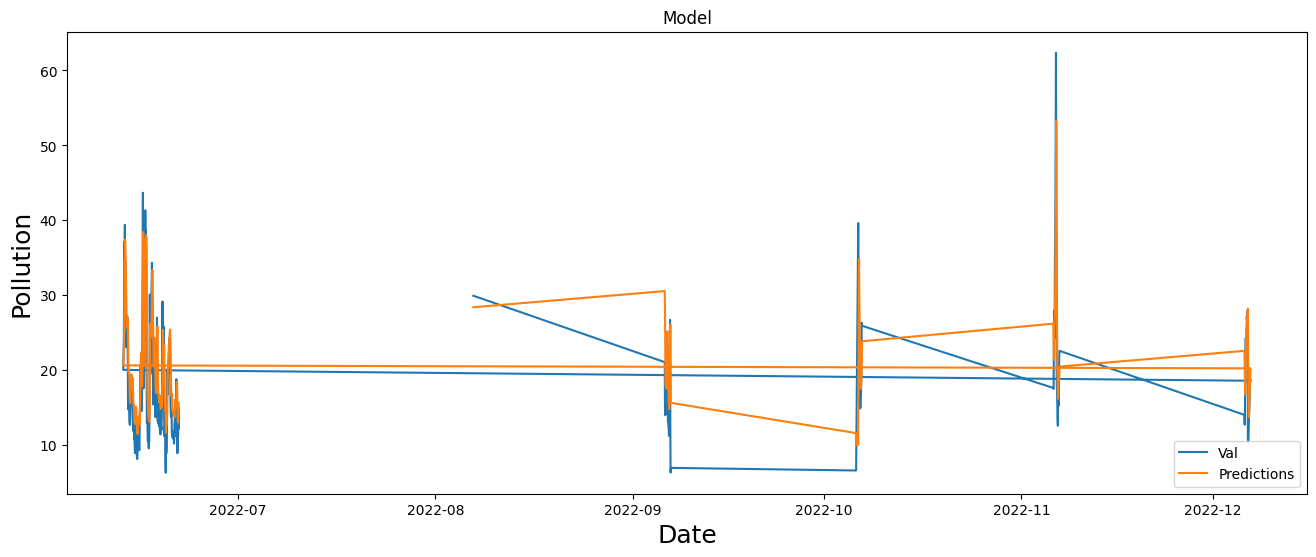

In [ ]:
# Plot the data
#train = data[:training_data_len]
valid = data[(len(dataset)-300):]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Pollution', fontsize=18)
#plt.plot(train['PM2.5'])
plt.plot(valid[['PM2.5', 'Predictions']])
plt.legend(['Val', 'Predictions'], loc='lower right')
plt.show()

In [ ]:
!pip install h5py

In [ ]:
from keras.models import load_model
from keras.models import save_model

In [ ]:
model.save('my_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.target_spec.supported_ops = [tf.lite.OpsSet.TFLITE_BUILTINS, tf.lite.OpsSet.SELECT_TF_OPS]
converter._experimental_lower_tensor_list_ops = False
tflite_model = converter.convert()

In [ ]:
open("/content/tflite_model.tflite","wb").write(tflite_model)

18912

In [ ]:
!apt-get -qq install xxd

In [ ]:
!xxd -i tflite_model.tflite > model.cc
!cat model.cc

unsigned char tflite_model_tflite[] = {
  0x1c, 0x00, 0x00, 0x00, 0x54, 0x46, 0x4c, 0x33, 0x14, 0x00, 0x20, 0x00,
  0x1c, 0x00, 0x18, 0x00, 0x14, 0x00, 0x10, 0x00, 0x0c, 0x00, 0x00, 0x00,
  0x08, 0x00, 0x04, 0x00, 0x14, 0x00, 0x00, 0x00, 0x1c, 0x00, 0x00, 0x00,
  0x88, 0x00, 0x00, 0x00, 0xd8, 0x00, 0x00, 0x00, 0xbc, 0x0f, 0x00, 0x00,
  0xcc, 0x0f, 0x00, 0x00, 0x28, 0x48, 0x00, 0x00, 0x03, 0x00, 0x00, 0x00,
  0x01, 0x00, 0x00, 0x00, 0x04, 0x00, 0x00, 0x00, 0x8a, 0xc9, 0xff, 0xff,
  0x0c, 0x00, 0x00, 0x00, 0x1c, 0x00, 0x00, 0x00, 0x38, 0x00, 0x00, 0x00,
  0x0f, 0x00, 0x00, 0x00, 0x73, 0x65, 0x72, 0x76, 0x69, 0x6e, 0x67, 0x5f,
  0x64, 0x65, 0x66, 0x61, 0x75, 0x6c, 0x74, 0x00, 0x01, 0x00, 0x00, 0x00,
  0x04, 0x00, 0x00, 0x00, 0xc4, 0xca, 0xff, 0xff, 0x33, 0x00, 0x00, 0x00,
  0x04, 0x00, 0x00, 0x00, 0x07, 0x00, 0x00, 0x00, 0x64, 0x65, 0x6e, 0x73,
  0x65, 0x5f, 0x33, 0x00, 0x01, 0x00, 0x00, 0x00, 0x04, 0x00, 0x00, 0x00,
  0x8e, 0xc9, 0xff, 0xff, 0x04, 0x00, 0x00, 0x00, 0x0c, 0x00, 0x00, 0x00